In [22]:
import tensorflow_datasets as tfds
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

train, info = tfds.load('voc', split='train', with_info=True)
valid = tfds.load('voc', split='validation')
test = tfds.load('voc', split='test')

print(info)

tfds.core.DatasetInfo(
    name='voc',
    full_name='voc/2007/4.0.0',
    description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge,
    corresponding to the Classification and Detection competitions.
    
    In the Classification competition, the goal is to predict the set of labels
    contained in the image, while in the Detection competition the goal is to
    predict the bounding box and label of each individual object.
    annotations.
    """,
    config_description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge
    2007, a.k.a. VOC2007.
    
    A total of 9963 images are included in this dataset, where each image
    contains a set of objects, out of 20 different classes, making a total of
    24640 annotated objects.
    
    """,
    homepage='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/',
    data_path='C:\\Users\\ASUS\\tensorflow_datasets\\voc\\2007\\4.0.0',
    file_format=tfrecord,
    

In [23]:
info.features['labels'].names

['aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

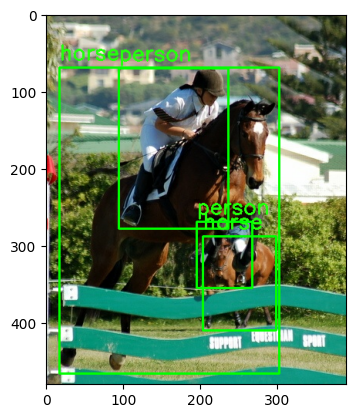

In [24]:
classes_list = info.features['labels'].names
for dataset in train.take(1):
    image = dataset['image']
    bbox = dataset['objects']['bbox']
    label = dataset['objects']['label']
    image = image.numpy()
    h, w, _ = image.shape
    for box, label in zip(bbox, label):
        x1 = tf.cast(box[1] * w, tf.int16).numpy()
        x2 = tf.cast(box[3] * w, tf.int16).numpy()
        y1 = tf.cast(box[0] * h, tf.int16).numpy()
        y2 = tf.cast(box[2] * h, tf.int16).numpy()

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, classes_list[label.numpy()], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)
        
plt.imshow(image)